In [ ]:
import glob
import os
import shutil
import random
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import keras.utils as image
from tensorflow.keras import layers
import matplotlib.pyplot as plt

: 

In [2]:
# Altere para o caminho que você quer verificar (pode ser o original ou o já dividido)
diretorio_para_validar = r'.\dataset\PetImages'

print(f"\n--- Iniciando Validação de Integridade de Arquivos em: {diretorio_para_validar} ---")

for dirpath, _, filenames in os.walk(diretorio_para_validar):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)

        # 1. Verifica se o arquivo está vazio
        if os.path.getsize(file_path) == 0:
            print(f"[PROBLEMA] Arquivo VAZIO: {file_path}")
            continue

        # 2. Tenta verificar a integridade da imagem
        try:
            img = Image.open(file_path)
            img.verify() # Tenta ler os metadados da imagem
        except Exception as e:
            print(f"[PROBLEMA] Arquivo CORROMPIDO: {file_path} (Erro: {e})")

print("\n--- Validação de Integridade Concluída ---")


--- Iniciando Validação de Integridade de Arquivos em: .\dataset\PetImages ---


c:\Users\lucas\OneDrive - 5qgclf\Documentos\Projetos Python\Dogs vs Cats\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))



--- Validação de Integridade Concluída ---


In [39]:
# Altere para o caminho que você quer verificar (pode ser o original ou o já dividido)
diretorio_para_validar = r'.\dataset\PetImages'

print(f"\n--- Iniciando Validação de Conteúdo (Canais/Modo) em: {diretorio_para_validar} ---")

for dirpath, _, filenames in os.walk(diretorio_para_validar):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        
        # Ignora arquivos que já sabemos que são problemáticos (vazios, etc.)
        if os.path.getsize(file_path) == 0:
            continue

        try:
            img = Image.open(file_path)
            num_canais = len(img.getbands())
            modo_cor = img.mode

            if num_canais not in [1, 3, 4]:
                print(f"[PROBLEMA] CANAIS INVÁLIDOS: {file_path} (Canais: {num_canais}, Modo: {modo_cor})")
            
            if modo_cor not in ['L', 'RGB', 'RGBA']:
                print(f"[PROBLEMA] MODO DE COR INCOMUM: {file_path} (Modo: {modo_cor})")

        except Exception:
            # Ignora arquivos corrompidos que já foram detectados no passo anterior
            pass
            
print("\n--- Validação de Conteúdo Concluída ---")


--- Iniciando Validação de Conteúdo (Canais/Modo) em: .\dataset\PetImages ---

--- Validação de Conteúdo Concluída ---


In [36]:
# Altere para o caminho que você quer verificar (pode ser o original ou o já dividido)
diretorio_alvo = r'.\dataset\PetImages'

def converter_imagens_para_rgb(diretorio_alvo):
    """
    Percorre um diretório de imagens, identifica aquelas que não estão no modo 'RGB'
    e as converte, sobrescrevendo o arquivo original.

    :param diretorio_alvo: Caminho para o diretório a ser processado.
    """
    
    imagens_convertidas = 0
    imagens_verificadas = 0
    
    print(f"Iniciando a varredura e conversão para RGB em: {diretorio_alvo}\n")

    # Percorre recursivamente todas as pastas e arquivos
    for dirpath, _, filenames in os.walk(diretorio_alvo):
        for filename in filenames:
            # Verifica se é um arquivo de imagem comum
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(dirpath, filename)
                imagens_verificadas += 1
                
                try:
                    img = Image.open(file_path)
                    
                    # Verifica se o modo da imagem é diferente de 'RGB'
                    if img.mode != 'RGB':
                        print(f"-> Convertendo '{file_path}' (Modo: {img.mode}) para RGB...")
                        
                        # Converte a imagem para o modo RGB
                        rgb_img = img.convert('RGB')
                        
                        # Salva a imagem convertida, sobrescrevendo a original
                        rgb_img.save(file_path)
                        
                        # Fecha os arquivos de imagem
                        img.close()
                        rgb_img.close()
                        
                        imagens_convertidas += 1
                    else:
                        # Fecha a imagem se ela já for RGB
                        img.close()

                except Exception as e:
                    print(f"[ERRO] Não foi possível processar o arquivo {file_path}. Erro: {e}")
    
    print("\n--- RESUMO DA CONVERSÃO ---")
    print(f"Total de imagens verificadas: {imagens_verificadas}")
    print(f"Total de imagens convertidas para RGB: {imagens_convertidas}")
    print("----------------------------")
    if imagens_convertidas > 0:
        print("Lembre-se de rodar o script de validação novamente para garantir a integridade dos arquivos.")

# --- CONFIGURAÇÃO ---
if __name__ == '__main__':
    # Defina o caminho para a sua pasta de imagens originais que você quer padronizar.
    # Lembre-se de fazer um backup antes!
    DIRETORIO_PARA_CONVERTER = r'.\dataset\PetImages' 
    
    converter_imagens_para_rgb(DIRETORIO_PARA_CONVERTER)

Iniciando a varredura e conversão para RGB em: .\dataset\PetImages

-> Convertendo '.\dataset\PetImages\Cat\10125.jpg' (Modo: P) para RGB...
-> Convertendo '.\dataset\PetImages\Cat\10501.jpg' (Modo: P) para RGB...
-> Convertendo '.\dataset\PetImages\Cat\10820.jpg' (Modo: P) para RGB...
-> Convertendo '.\dataset\PetImages\Cat\11095.jpg' (Modo: P) para RGB...
[ERRO] Não foi possível processar o arquivo .\dataset\PetImages\Cat\11095.jpg. Erro: [Errno 22] Invalid argument: '.\\dataset\\PetImages\\Cat\\11095.jpg'
-> Convertendo '.\dataset\PetImages\Cat\11210.jpg' (Modo: P) para RGB...
-> Convertendo '.\dataset\PetImages\Cat\11565.jpg' (Modo: P) para RGB...
-> Convertendo '.\dataset\PetImages\Cat\11874.jpg' (Modo: P) para RGB...
-> Convertendo '.\dataset\PetImages\Cat\11935.jpg' (Modo: P) para RGB...
-> Convertendo '.\dataset\PetImages\Cat\12080.jpg' (Modo: P) para RGB...
[ERRO] Não foi possível processar o arquivo .\dataset\PetImages\Cat\12080.jpg. Erro: [Errno 22] Invalid argument: '.\\dat

In [41]:
def dividir_dataset(source_dir, output_dir, split_ratios=(0.7, 0.15, 0.15)):
    """
    Divide um diretório de imagens classificado por pastas em conjuntos
    de treino, validação e teste.

    :param source_dir: Caminho para o diretório com as pastas das classes (ex: 'imagens_originais').
    :param output_dir: Caminho para o diretório de saída onde os splits serão criados (ex: 'dataset').
    :param split_ratios: Uma tupla com as proporções para (treino, validação, teste).
    """
    
    # Validação das proporções
    if sum(split_ratios) != 1.0:
        raise ValueError("A soma das proporções de divisão deve ser 1.0")

    train_ratio, val_ratio, test_ratio = split_ratios
    # total_needed = sum(split_counts)

    # Cria o diretório de saída e os subdiretórios se não existirem
    print(f"Criando diretórios de saída em: {output_dir}")
    os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'validation'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

    # Pega os nomes das classes (nomes das pastas no diretório fonte)
    classes = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
    
    if not classes:
        print("Nenhuma pasta de classe encontrada no diretório de origem.")
        return

    print(f"Classes encontradas: {classes}")

    # Processa cada classe individualmente
    for class_name in classes:
        print(f"\nProcessando a classe: {class_name}")

        # Cria os subdiretórios das classes nos splits de destino
        path_treino = os.path.join(output_dir, 'train', class_name)
        path_validacao = os.path.join(output_dir, 'validation', class_name)
        path_teste = os.path.join(output_dir, 'test', class_name)
        os.makedirs(path_treino, exist_ok=True)
        os.makedirs(path_validacao, exist_ok=True)
        os.makedirs(path_teste, exist_ok=True)

        # Caminho da pasta original da classe
        source_class_path = os.path.join(source_dir, class_name)
        
        # Lista todas as imagens na pasta da classe
        imagens = [f for f in os.listdir(source_class_path) if os.path.isfile(os.path.join(source_class_path, f))]
        
        # Embaralha a lista de imagens para garantir uma divisão aleatória
        random.shuffle(imagens)
        
        total_imagens = len(imagens)
        print(f"Total de imagens encontradas: {total_imagens}")
        
        # Define os pontos de corte com base nas contagens fixas
        # ponto_corte_treino = train_count
        # ponto_corte_validacao = train_count + val_count
        # ponto_corte_teste = train_count + val_count + test_count

        # Calcula os pontos de corte para a divisão
        ponto_corte_treino = int(train_ratio * total_imagens)
        ponto_corte_validacao = int((train_ratio + val_ratio) * total_imagens)
        
        # Divide a lista de arquivos
        arquivos_treino = imagens[:ponto_corte_treino]
        arquivos_validacao = imagens[ponto_corte_treino:ponto_corte_validacao]
        arquivos_teste = imagens[ponto_corte_validacao:]
        
        # Função auxiliar para copiar os arquivos
        def copiar_arquivos(lista_arquivos, destino, nome_classe):
            for arquivo in lista_arquivos:
                origem = os.path.join(source_class_path, arquivo)
                novo_nome_arquivo = f"{nome_classe.lower()}{arquivo}"
                # Cria o caminho completo de destino com o novo nome
                destino_com_novo_nome = os.path.join(destino, novo_nome_arquivo)
                shutil.copy(origem, destino_com_novo_nome)
        
        # Copia os arquivos para seus respectivos diretórios
        print(f"Copiando {len(arquivos_treino)} imagens para o conjunto de treino...")
        copiar_arquivos(arquivos_treino, path_treino, class_name)
        
        print(f"Copiando {len(arquivos_validacao)} imagens para o conjunto de validação...")
        copiar_arquivos(arquivos_validacao, path_validacao, class_name)
        
        print(f"Copiando {len(arquivos_teste)} imagens para o conjunto de teste...")
        copiar_arquivos(arquivos_teste, path_teste, class_name)

    print("\nProcesso de divisão do dataset concluído com sucesso!")

# --- CONFIGURAÇÃO ---
if __name__ == '__main__':
    # Defina o caminho para a pasta que contém suas pastas 'gatos' e 'caes'
    SOURCE_DIR = 'dataset\PetImages' 
    
    # Defina o caminho para a nova pasta onde o dataset será criado
    OUTPUT_DIR = 'dataset'
    
    # Defina as proporções (treino, validação, teste)
    # 70% para treino, 15% para validação, 15% para teste
    SPLIT_RATIOS = (0.7, 0.15, 0.15)
    # SPLIT_COUNTS = (200, 50, 50)
    
    # Supondo que suas pastas originais sejam 'caes' e 'gatos'
    # Crie a pasta 'imagens_originais' e mova 'caes' e 'gatos' para dentro dela
    # Exemplo:
    # /seu_projeto
    #     /imagens_originais
    #         /caes
    #             - img1.jpg
    #             - img2.jpg
    #         /gatos
    #             - imgA.jpg
    #             - imgB.jpg
    #     - preparar_dataset.py

    dividir_dataset(SOURCE_DIR, OUTPUT_DIR, SPLIT_RATIOS)

Criando diretórios de saída em: dataset
Classes encontradas: ['Cat', 'Dog']

Processando a classe: Cat
Total de imagens encontradas: 12494
Copiando 8745 imagens para o conjunto de treino...
Copiando 1874 imagens para o conjunto de validação...
Copiando 1875 imagens para o conjunto de teste...

Processando a classe: Dog
Total de imagens encontradas: 12498
Copiando 8748 imagens para o conjunto de treino...
Copiando 1875 imagens para o conjunto de validação...
Copiando 1875 imagens para o conjunto de teste...

Processo de divisão do dataset concluído com sucesso!


In [2]:
# Parâmetros
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
DATA_DIR = 'dataset'

# Carregar os datasets de treino e validação
train_dataset = tf.keras.utils.image_dataset_from_directory(
    f"{DATA_DIR}/train",
    labels='inferred',
    label_mode='binary', # 'binary' para 2 classes. 0 para uma, 1 para outra.
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode='rgb',
    validation_split=0.5, # <-- Diz para reservar 50% dos dados
    subset='training',    # <-- Diz para usar apenas a parte de 'treino' (os primeiros 50%)
    seed=123              # <-- Importante para garantir que a divisão seja sempre a mesma
)

# Carregar os datasets de teste e validação
test_dataset = tf.keras.utils.image_dataset_from_directory(
    f"{DATA_DIR}/test",
    labels='inferred',
    label_mode='binary', # 'binary' para 2 classes. 0 para uma, 1 para outra.
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode='rgb',
    validation_split=0.5, # <-- Diz para reservar 50% dos dados
    subset='training',    # <-- Diz para usar apenas a parte de 'treino' (os primeiros 50%)
    seed=123              # <-- Importante para garantir que a divisão seja sempre a mesma
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    f"{DATA_DIR}/validation",
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode='rgb'
)

# Ver as classes que foram encontradas
class_names = train_dataset.class_names
print(f"Classes encontradas: {class_names}")

# Otimizar o pipeline de dados para performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 17489 files belonging to 2 classes.
Using 8745 files for training.
Found 3749 files belonging to 2 classes.
Using 1875 files for training.
Found 3747 files belonging to 2 classes.
Classes encontradas: ['Cat', 'Dog']


In [6]:
from IPython.display import clear_output
import time

# Supondo que seu test_dataset já foi criado e você tem os nomes das classes
# Exemplo:
# DATA_DIR = 'dataset_reduzido'
# IMAGE_SIZE = (224, 224)
# BATCH_SIZE = 32 # Pode ser um valor menor para a visualização, como 10
# test_dataset = tf.keras.utils.image_dataset_from_directory(...)
# class_names = test_dataset.class_names # ['Cat', 'Dog'] ou ['caes', 'gatos']

# --- Loop Externo: Itera sobre cada LOTE (BATCH) no dataset ---
for images_batch, labels_batch in train_dataset:
    
    # --- Loop Interno: Itera sobre cada IMAGEM dentro do lote atual ---
    for i in range(len(images_batch)):
        
        # --- ALTERAÇÃO PRINCIPAL ---
        # 1. Limpa a saída da célula antes de exibir a próxima imagem.
        #    wait=True garante uma transição suave, sem piscar.
        clear_output(wait=True)
        
        # Seleciona a imagem e o rótulo atuais
        imagem_atual = images_batch[i]
        rotulo_atual = labels_batch[i]

        titulo = f"Rótulo: {int(rotulo_atual.numpy())}"

        # Printa o tensor da imagem
        print("--- Matriz de Pixels da Primeira Imagem ---")
        print(titulo)
        print(imagem_atual)
        print("------------------------------------------")

        # 2. Exibe a imagem normalmente com matplotlib
        # plt.figure(figsize=(6, 6))
        
        # titulo = f"Rótulo: {int(rotulo_atual.numpy())}"
        # # Se você tiver a lista class_names:
        # # titulo = f"Rótulo: {class_names[int(rotulo_atual.numpy())]}"

        # plt.imshow(imagem_atual.numpy().astype("uint8"))
        # plt.title(titulo, fontsize=16)
        # plt.axis("off")
        
        # # 3. plt.show() desenha a imagem na saída recém-limpa
        # plt.show()
        
        # # 4. É uma boa prática fechar a figura para liberar memória
        # plt.close()
        
        # # 5. Adiciona uma pequena pausa para que possamos ver a imagem
        time.sleep(0.1) # Espere meio segundo (ajuste conforme preferir)

    # 6. Incrementa o contador total de imagens batch      
    # contador_total += 1

    # if contador_total >= 10:
    #     break # Interrompe o loop externo

--- Matriz de Pixels da Primeira Imagem ---
Rótulo: 1
tf.Tensor(
[[[ 86.61607  118.61607  141.61607 ]
  [ 86.15179  118.15179  141.15178 ]
  [ 80.22581  112.065094 135.14545 ]
  ...
  [101.03759   72.03759   42.037586]
  [ 99.212776  68.212776  39.967236]
  [104.28911   73.28911   45.19484 ]]

 [[ 86.445076 118.445076 141.44507 ]
  [ 85.41518  117.41518  140.41518 ]
  [ 82.333664 112.81812  136.57588 ]
  ...
  [ 98.81696   69.81696   38.343746]
  [102.817     71.817     41.343784]
  [104.635216  73.635216  44.23185 ]]

 [[ 86.24366  118.24366  140.7883  ]
  [ 84.34491  116.117226 138.66187 ]
  [ 84.08526  114.25806  137.5933  ]
  ...
  [105.602684  76.14732   44.375004]
  [107.10386   75.76574   43.889557]
  [105.37939   74.22056   41.700787]]

 ...

 [[106.790886 133.2462   156.01854 ]
  [109.316895 135.77222  158.54456 ]
  [116.19212  142.64745  165.41978 ]
  ...
  [110.75587  121.98353  143.98354 ]
  [113.38613  131.35164  153.4275  ]
  [118.78391  139.10092  160.32858 ]]

 [[111.07

: 

In [3]:
# Altere para o caminho que você quer verificar (pode ser o original ou o já dividido)
diretorio_alvo = r'.\dataset\train'

def encontrar_arquivo_problematico_com_tf(diretorio_alvo):
    """
    Usa o decodificador do TensorFlow para testar cada imagem individualmente
    e encontrar a primeira que causa um erro de decodificação.

    :param diretorio_alvo: Caminho para o diretório a ser verificado.
    :return: O caminho para o primeiro arquivo problemático encontrado, ou None se nenhum erro ocorrer.
    """
    
    print(f"Iniciando verificação com TensorFlow em: {diretorio_alvo}\n")
    
    # Percorre recursivamente todas as pastas e arquivos
    for dirpath, _, filenames in os.walk(diretorio_alvo):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                
                # Imprime o arquivo que está sendo verificado para dar um feedback
                print(f"Verificando: {file_path}", end='\r')

                try:
                    # 1. Lê o conteúdo bruto do arquivo em bytes
                    img_bytes = tf.io.read_file(file_path)
                    
                    # 2. Tenta decodificar a imagem a partir dos bytes.
                    #    Esta é a mesma operação que falha durante o treinamento.
                    #    Usamos channels=3 para forçar a conversão para RGB.
                    tf.io.decode_image(img_bytes, channels=3)

                except tf.errors.InvalidArgumentError as e:
                    # 3. Se a decodificação falhar, encontramos o culpado!
                    print("\n" + "="*50)
                    print("!! ERRO ENCONTRADO !!")
                    print(f"O seguinte arquivo está corrompido ou em um formato inválido:")
                    print(f"ARQUIVO: {file_path}")
                    print(f"MENSAGEM DE ERRO DO TF: {e.message}")
                    print("="*50)
                    return file_path # Retorna o caminho e para a execução
    
    print("\nVerificação concluída. Nenhum erro de decodificação encontrado pelo TensorFlow.")
    return None

# --- CONFIGURAÇÃO ---
if __name__ == '__main__':
    # Defina o caminho para a pasta que contém seus dados.
    # Pode ser a pasta original (ex: 'PetImages') ou a já dividida ('dataset').
    DIRETORIO_PARA_VERIFICAR = r'.\dataset\train'
    
    arquivo_com_erro = encontrar_arquivo_problematico_com_tf(DIRETORIO_PARA_VERIFICAR)
    
    if arquivo_com_erro:
        print(f"\nAção recomendada: Delete ou substitua o arquivo '{arquivo_com_erro}'.")

Iniciando verificação com TensorFlow em: .\dataset\train

Verificando: .\dataset\train\Dog\dog9999.jpgg
Verificação concluída. Nenhum erro de decodificação encontrado pelo TensorFlow.


In [1]:
for images, labels in train_dataset:
    pass # apenas itera, se alguma imagem estiver corrompida vai dar erro aqui

NameError: name 'train_dataset' is not defined

In [3]:
# Criando o modelo Sequencial
model = keras.Sequential([
    # Input Layer e Data Augmentation
    layers.Input(shape=(224, 224, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),

    # Normalização dos pixels para a faixa [0, 1]
    layers.Rescaling(1./255),

    # Bloco Convolucional 1
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Bloco Convolucional 2
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Bloco Convolucional 3
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Achatamento (Flatten) para preparar para o classificador
    layers.Flatten(),

    # Camadas Densas (Classificador)
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.5), # Adicionando Dropout para regularização
    # Camada de Saída: 1 neurônio com ativação sigmoide para classificação binária
    layers.Dense(units=1, activation='sigmoid')
])

# Visualizar a arquitetura do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,714,721 (98.09 MB)

 Trainable params: 25,714,721 (98.09 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(
    optimizer='adam', # Otimizador Adam é uma excelente escolha padrão
    loss=tf.keras.losses.BinaryCrossentropy(), # Loss para classificação binária com saída sigmoide
    metrics=['accuracy'] # Métrica para acompanhar durante o treino
)

In [ ]:
EPOCHS = 15 

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=test_dataset
)

Epoch 1/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 227s 410ms/step - accuracy: 0.6230 - loss: 0.6586 - val_accuracy: 0.6683 - val_loss: 0.6167
Epoch 2/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 205s 375ms/step - accuracy: 0.6848 - loss: 0.6008 - val_accuracy: 0.6997 - val_loss: 0.5874
Epoch 3/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 200s 365ms/step - accuracy: 0.7060 - loss: 0.5692 - val_accuracy: 0.7285 - val_loss: 0.5437
Epoch 4/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 196s 358ms/step - accuracy: 0.7213 - loss: 0.5476 - val_accuracy: 0.7264 - val_loss: 0.5374
Epoch 5/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 196s 359ms/step - accuracy: 0.7405 - loss: 0.5257 - val_accuracy: 0.7632 - val_loss: 0.4946
Epoch 6/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 195s 356ms/step - accuracy: 0.7548 - loss: 0.4996 - val_accuracy: 0.7712 - val_loss: 0.4742
Epoch 7/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 196s 359ms/step - accuracy: 0.7676 - loss: 0.4834 - val_accuracy: 0.7691 - val_loss: 0.4671
Epoch 8/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 194s 355ms/step - accuracy: 0.7784 -

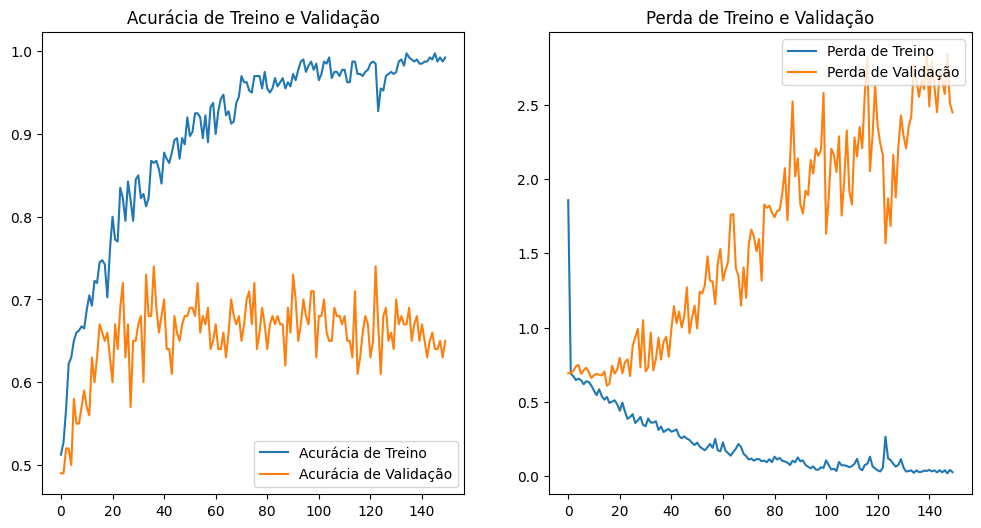

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

Fazendo previsões em todo o conjunto de validação...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

--- Relatório de Classificação ---
              precision    recall  f1-score   support

         Cat       0.65      0.62      0.63        50
         Dog       0.63      0.66      0.65        50

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100


--- Matriz de Confusão ---
[[31 19]
 [17 33]]

     Previsto: Cat  | Previsto: Dog
Real: Cat |   31       |   19   
Real: Dog |   17       |   33   
--------------------------------

Exibindo alguns exemplos de previsões...


C:\Users\lucas\AppData\Local\Temp\ipykernel_4728\2949398928.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label_index = int(labels[i].numpy())


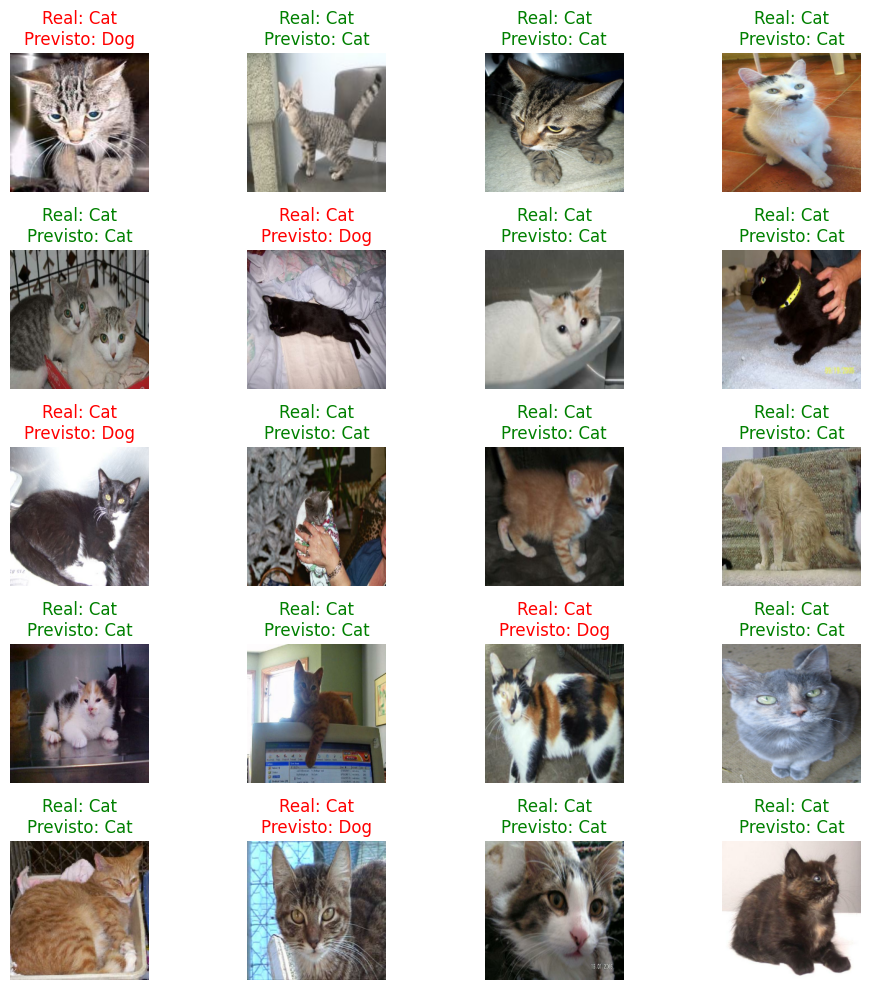

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Nomes das classes na ordem correta (geralmente alfabética)
CLASS_NAMES = ['Cat', 'Dog'] # Ou ['caes', 'gatos']

# --- 2. FAZER PREVISÕES E EXTRAIR RÓTULOS VERDADEIROS ---
print("Fazendo previsões em todo o conjunto de validação...")
# model.predict itera por todos os lotes do dataset e retorna um único array
predictions = model.predict(validation_dataset)

# Extrai os rótulos verdadeiros do dataset
# Itera pelo dataset, pega os rótulos (y) de cada lote e os concatena
true_labels = np.concatenate([y for x, y in validation_dataset], axis=0)

# Converte as previsões (probabilidades) em rótulos de classe (0 ou 1)
# Se a previsão > 0.5, a classe é 1 (Dog), senão é 0 (Cat)
predicted_labels = (predictions > 0.5).astype(int)

# --- 3. AVALIAÇÃO QUANTITATIVA ---
print("\n--- Relatório de Classificação ---")
# Mostra precisão, recall, f1-score para cada classe
print(classification_report(true_labels, predicted_labels, target_names=CLASS_NAMES))

print("\n--- Matriz de Confusão ---")
# Mostra quantos foram classificados corretamente e incorretamente
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)
print("\n     Previsto: Cat  | Previsto: Dog")
print(f"Real: Cat |   {cm[0][0]:<5}    |   {cm[0][1]:<5}")
print(f"Real: Dog |   {cm[1][0]:<5}    |   {cm[1][1]:<5}")
print("--------------------------------")


# --- 4. VISUALIZAÇÃO DE EXEMPLOS ---
print("\nExibindo alguns exemplos de previsões...")

# Pega o primeiro lote de imagens e rótulos para visualização
for images, labels in validation_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(20): # Exibe as 9 primeiras imagens do lote
        ax = plt.subplot(5, 4, i + 1)
        
        # Exibe a imagem
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Pega o rótulo verdadeiro e o previsto para esta imagem
        true_label_index = int(labels[i].numpy())
        predicted_label_index = predicted_labels[i][0] # O índice corresponde à ordem
        
        true_class_name = CLASS_NAMES[true_label_index]
        predicted_class_name = CLASS_NAMES[predicted_label_index]
        
        # Define o título e a cor (verde se acertou, vermelho se errou)
        title = f"Real: {true_class_name}\nPrevisto: {predicted_class_name}"
        color = "green" if true_label_index == predicted_label_index else "red"
        
        plt.title(title, color=color)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
model.save('meu_modelo_caes_gatos.keras')